# Sage

Sage (also known as SageMath) is a general purpose computer algebra system written on top of the python language. In Mathematica, Magma, and Maple, one writes code in the mathematica-language, the magma-language, or the maple-language. Sage is python.

But no python background is necessary for the rest of today's guided tutorial. The purpose of today's tutorial is to give an indication about how one really *uses* sage, and what might be available to you if you want to try it out.

I will spoil the surprise by telling you upfront the two main points I hope you'll take away from this tutorial.

1. With tab-completion and documentation, you can do many things in sage without ever having done them before.
2. The ecosystem of libraries and functionality available in sage is tremendous, and (usually) pretty easy to use.

## Lightning Preview

Let's first get a small feel for sage by seeing some standard operations and what typical use looks like through a series of trivial, mostly unconnected examples.

In [1]:
# Fundamental manipulations work as you hope

2+3

5

You can also subtract, multiply, divide, exponentiate...

    >>> 3-2
    1
    >>> 2*3
    6
    >>> 2^3
    8
    >>> 2**3 # (also exponentiation)
    8
    
There is an order of operations, but these things work pretty much as you want them to work. You might try out several different operations.

Sage includes a lot of functionality, too. For instance,

In [2]:
factor(-1008)

-1 * 2^4 * 3^2 * 7

In [3]:
list(factor(1008))

[(2, 4), (3, 2), (7, 1)]

In the background, Sage is actually calling on pari/GP to do this factorization. Sage bundles lots of free and open source math software within it (which is why it's so large), and provides a common access point. The great thing here is that you can often use sage without needing to know much pari/GP (or other software).

Sage knows many functions and constants, and these are accessible.

In [4]:
sin(pi)

0

In [5]:
exp(2)

e^2

Sage tries to internally keep expressions in exact form. To present approximations, use `N()`.

In [6]:
N(exp(2))

7.38905609893065

In [7]:
pi

pi

In [8]:
N(pi)

3.14159265358979

You can ask for a number of digits in the approximation by giving a `digits` keyword to `N()`.

In [9]:
N(pi, digits=60)

3.14159265358979323846264338327950288419716939937510582097494

There are some benefits to having smart representations. In many computer algebra systems, computing (sqrt(2))^2 doesn't give you back 2, due to finite floating point arithmetic. But in sage, this problem is sometimes avoided.

In [10]:
sqrt(2)

sqrt(2)

In [11]:
sqrt(2)**2

2

Of course, there are examples where floating point arithmetic gets in the way.

In sage/python, integers have unlimited digit length. Real precision arithmetic is a bit more complicated, which is why sage tries to keep exact representations internally. We don't go into tracking digits of precision in sage, but it is usually possible to prescribe levels of precision.

Sage is written in python. You can use python functions in sage. [You can also import python libraries in sage, which extends sage's reach significantly]. The `range` function in python counts up to a given number, starting at 0.

In [12]:
range(16)

range(0, 16)

In [13]:
A = matrix(4,4, range(16))
A

[ 0  1  2  3]
[ 4  5  6  7]
[ 8  9 10 11]
[12 13 14 15]

In [14]:
B = matrix(4,4, range(-5, 11))
B

[-5 -4 -3 -2]
[-1  0  1  2]
[ 3  4  5  6]
[ 7  8  9 10]

Sage can be smart about using the same operators in different contexts. (i.e. sage is very polymorphic). Multiplying, adding, subtracting, and dividing matrices works as expected.

In [15]:
A*B

[ 26  32  38  44]
[ 42  64  86 108]
[ 58  96 134 172]
[ 74 128 182 236]

There are two sorts of ways that functions are called in sage. For some functions, you create the object (in this case, the matrix A), type a dot `.`, and then call the function.

In [16]:
A.charpoly()

x^4 - 30*x^3 - 80*x^2

There are some top-level functions as well.

In [17]:
factor(A.charpoly())

x^2 * (x^2 - 30*x - 80)

Sometimes you start with an object, such as a matrix, and you wonder what you can do with it. Sage has very good tab-completion and introspection in its notebook interface.

Try typing 

    A.
    
and hit `<Tab>`. Sage should display a list of things it thinks it can do to the matrix A.

### Warning

Note that on CoCalc or external servers, tab completion sometimes has a small delay.

In [18]:
A.eigenvalues

<built-in method eigenvalues of sage.matrix.matrix_integer_dense.Matrix_integer_dense object at 0x7fde2ef0dab0>

Some of these are more meaningful than others, but you have a list of options. If you want to find out what an option does, like `A.eigenvalues()`, then type 

    A.eigenvalues?
    
and hit enter.

In [19]:
A.eigenvalues?

Docstring:     
   Return a sequence of the eigenvalues of a matrix, with
   multiplicity. If the eigenvalues are roots of polynomials in QQ,
   then QQbar elements are returned that represent each separate root.

   If the option extend is set to False, only eigenvalues in the base
   ring are considered.

   EXAMPLES:

      sage: a = matrix(ZZ, 4, range(16)); a
      [ 0  1  2  3]
      [ 4  5  6  7]
      [ 8  9 10 11]
      [12 13 14 15]
      sage: sorted(a.eigenvalues(), reverse=True)
      [32.46424919657298?, 0, 0, -2.464249196572981?]

      sage: a=matrix([(1, 9, -1, -1), (-2, 0, -10, 2), (-1, 0, 15, -2), (0, 1, 0, -1)])
      sage: a.eigenvalues()
      [-0.9386318578049146?, 15.50655435353258?, 0.2160387521361705? - 4.713151979747493?*I, 0.2160387521361705? + 4.713151979747493?*I]

   A symmetric matrix a+a.transpose() should have real eigenvalues

      sage: b=a+a.transpose()
      sage: ev = b.eigenvalues(); ev
      [-8.35066086057957?, -1.107247901349379?, 5.718651326

In [20]:
A.eigenvalues()

[0, 0, -2.464249196572981?, 32.46424919657298?]

If you're really curious about what's going on, you can type

    A.eigenvalues??
    
which will also show you the implementation of that functionality. (You usually don't need this).

In [21]:
A.eigenvalues??

Docstring:
   Return a sequence of the eigenvalues of a matrix, with
   multiplicity. If the eigenvalues are roots of polynomials in QQ,
   then QQbar elements are returned that represent each separate root.

   If the option extend is set to False, only eigenvalues in the base
   ring are considered.

   EXAMPLES:

      sage: a = matrix(ZZ, 4, range(16)); a
      [ 0  1  2  3]
      [ 4  5  6  7]
      [ 8  9 10 11]
      [12 13 14 15]
      sage: sorted(a.eigenvalues(), reverse=True)
      [32.46424919657298?, 0, 0, -2.464249196572981?]

      sage: a=matrix([(1, 9, -1, -1), (-2, 0, -10, 2), (-1, 0, 15, -2), (0, 1, 0, -1)])
      sage: a.eigenvalues()
      [-0.9386318578049146?, 15.50655435353258?, 0.2160387521361705? - 4.713151979747493?*I, 0.2160387521361705? + 4.713151979747493?*I]

   A symmetric matrix a+a.transpose() should have real eigenvalues

      sage: b=a+a.transpose()
      sage: ev = b.eigenvalues(); ev
      [-8.35066086057957?, -1.107247901349379?, 5.71865132670851

There is a lot of domain-specific functionality within sage as well. We won't dwell too much on any particular functionality in this tutorial, but for example sage knows about elliptic curves.

In [22]:
E = EllipticCurve([1,2,3,4,5])
E

Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field

In [23]:
# Tab complete me to see what's available
#E.

In [24]:
E.conductor()

10351

In [25]:
E.rank()

1

Sage knows about complex numbers as well. Use `i` or `I` to mean a $\sqrt{-1}$.

In [26]:
(1+2*I) * (pi - sqrt(5)*I)

(2*I + 1)*pi - (I - 2)*sqrt(5)

In [27]:
c = 1/(sqrt(3)*I + 3/4 + sqrt(29)*2/3)

Sage tries to keep computations in exact form. So `c` is stored with perfect representations of square roots.

In [28]:
c

12/(8*sqrt(29) + 12*I*sqrt(3) + 9)

But we can have sage give numerical estimates of objects by calling `N()` on them.

In [29]:
N(c)

0.198754342458965 - 0.0793188720015053*I

In [30]:
N(c, 20) # Keep 20 "bits" of information

0.19875 - 0.079319*I

As one more general topic before we jump into a few deeper examples, sage is also very good at representing objects in latex. Use `latex(<object>)` to give a latex representation.

In [31]:
latex(c)

\frac{12}{8 \, \sqrt{29} + 12 i \, \sqrt{3} + 9}

In [32]:
latex(E)

y^2 + x y + 3 y = x^{3} + 2 x^{2} + 4 x + 5 

In [33]:
latex(A)

\left(\begin{array}{rrrr}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7 \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15
\end{array}\right)

You can have sage print the LaTeX version in the notebook by using `pretty_print`

In [34]:
pretty_print(A)

[ 0  1  2  3]
[ 4  5  6  7]
[ 8  9 10 11]
[12 13 14 15]

## Basic Algebra

In [35]:
H = DihedralGroup(6)
H.list()

[(),
 (1,5,3)(2,6,4),
 (1,3,5)(2,4,6),
 (1,6,5,4,3,2),
 (1,4)(2,5)(3,6),
 (1,2,3,4,5,6),
 (2,6)(3,5),
 (1,5)(2,4),
 (1,3)(4,6),
 (1,6)(2,5)(3,4),
 (1,4)(2,3)(5,6),
 (1,2)(3,6)(4,5)]

In [36]:
a = H[1]
a

(1,5,3)(2,6,4)

In [37]:
a.order()

3

In [38]:
b = H[2]
b

(1,3,5)(2,4,6)

In [39]:
a*b

()

In [40]:
for elem in H:
    if elem.order() == 2:
        print(elem)

(1,4)(2,5)(3,6)
(2,6)(3,5)
(1,5)(2,4)
(1,3)(4,6)
(1,6)(2,5)(3,4)
(1,4)(2,3)(5,6)
(1,2)(3,6)(4,5)


In [41]:
# Or, in the "pythonic" way
elements_of_order_2 = [elem for elem in H if elem.order() == 2]
elements_of_order_2

[(1,4)(2,5)(3,6),
 (2,6)(3,5),
 (1,5)(2,4),
 (1,3)(4,6),
 (1,6)(2,5)(3,4),
 (1,4)(2,3)(5,6),
 (1,2)(3,6)(4,5)]

In [42]:
rand_elem = H.random_element()
rand_elem

(1,5,3)(2,6,4)

In [43]:
G_sub = H.subgroup([rand_elem])
G_sub

Subgroup generated by [(1,5,3)(2,6,4)] of (Dihedral group of order 12 as a permutation group)

In [44]:
# Explicitly using elements of a group
H("(1,2,3,4,5,6)") * H("(1,5)(2,4)")

(1,4)(2,3)(5,6)

### Exercises

The real purpose of these exercises are to show you that it's often possible to use tab-completion to quickly find out what is and isn't possible to do within sage.

1. What things does sage know about this subgroup? Can you find the cardinality of the subgroup? (Note that the subgroup is generated by a random element, and your subgroup might be different than your neighbor's). Can you list all subgroups of the dihedral group in sage?

2. Sage knows other groups as well. Create a symmetric group on 5 elements. What does sage know about that? Can you verify that S5 isn't simple? Create some cyclic groups?

## Changing the Field

It's pretty easy to work over different fields in sage as well. I show a few examples of this

In [45]:
# It may be necessary to use `reset('x')` if x has otherwise been defined
K.<alpha> = NumberField(x**3 - 5)

In [51]:
K

Number Field in alpha with defining polynomial x^3 - 5

In [52]:
alpha

alpha

In [53]:
alpha**3

5

In [54]:
(alpha+1)**3

3*alpha^2 + 3*alpha + 6

In [55]:
GF?

Type:           FiniteFieldFactory
String form:    <sage.rings.finite_rings.finite_field_constructor.FiniteFieldFactory object at 0x7fde3e80fe20>
File:           /usr/lib/python3/dist-packages/sage/rings/finite_rings/finite_field_constructor.py
Docstring:     
   Return the globally unique finite field of given order with
   generator labeled by the given name and possibly with given
   modulus.

   INPUT:

   * "order" -- a prime power

   * "name" -- string, optional.  Note that there can be a substantial
     speed penalty (in creating extension fields) when omitting the
     variable name, since doing so triggers the computation of pseudo-
     Conway polynomials in order to define a coherent lattice of
     extensions of the prime field.  The speed penalty grows with the
     size of extension degree and with the number of factors of the
     extension degree.

   * "modulus" -- (optional) either a defining polynomial for the
     field, or a string specifying an algorithm to use 

In [56]:
F7 = GF(7)

In [57]:
a = 2/5
a

2/5

In [58]:
F7(a)

6

In [59]:
var('x')

x

In [60]:
eqn = x**3 + sqrt(2)*x + 5 == 0
a = solve(eqn, x)[0].rhs()

In [61]:
a

-1/2*(I*sqrt(3) + 1)*(1/6*sqrt(8/3*sqrt(2) + 225) - 5/2)^(1/3) + 1/6*sqrt(2)*(-I*sqrt(3) + 1)/(1/6*sqrt(8/3*sqrt(2) + 225) - 5/2)^(1/3)

In [62]:
latex(a)

-\frac{1}{2} \, {\left(i \, \sqrt{3} + 1\right)} {\left(\frac{1}{6} \, \sqrt{\frac{8}{3} \, \sqrt{2} + 225} - \frac{5}{2}\right)}^{\frac{1}{3}} + \frac{\sqrt{2} {\left(-i \, \sqrt{3} + 1\right)}}{6 \, {\left(\frac{1}{6} \, \sqrt{\frac{8}{3} \, \sqrt{2} + 225} - \frac{5}{2}\right)}^{\frac{1}{3}}}

In [63]:
pretty_print(a)

-1/2*(I*sqrt(3) + 1)*(1/6*sqrt(8/3*sqrt(2) + 225) - 5/2)^(1/3) + 1/6*sqrt(2)*(-I*sqrt(3) + 1)/(1/6*sqrt(8/3*sqrt(2) + 225) - 5/2)^(1/3)

In [64]:
# Also RR, CC
QQ

Rational Field

In [65]:
K.<b> = QQ[a]

In [66]:
K

Number Field in a with defining polynomial x^6 + 10*x^3 - 2*x^2 + 25 with a = 0.7185272465828846? - 1.721353471724806?*I

In [67]:
a.minpoly()

x^6 + 10*x^3 - 2*x^2 + 25

In [68]:
K.class_number()

5

### Exercise

Sage tries to keep the same syntax even across different applications. Above, we factored a few integers. But we may also try to factor over a number field. You can factor 2 over the Gaussian integers by:

1. Create the Gaussian integers. The constructor CC[I] works.
2. Get the Gaussian integer 2 (which is programmatically different than the typical integer 2), by something like `CC[I](2)`.
3. `factor` that 2.



## Some Calculus And Symbolic Manipulation

In [69]:
# Let's declare that we want x and y to mean symbolic variables
x = 1
y = 2
print(x+y)

reset('x')
reset('y')
var('x')
var('y')

print(x+y)

3
x + y


In [70]:
solve(x^2 + 3*x + 2, x)

[x == -2, x == -1]

In [71]:
solve(x^2 + y*x + 2 == 0, x)

[x == -1/2*y - 1/2*sqrt(y^2 - 8), x == -1/2*y + 1/2*sqrt(y^2 - 8)]

In [72]:
# Nonlinear systems with complicated solutions can be solved as well
var('p,q')
eq1 = p+1==9
eq2 = q*y+p*x==-6
eq3 = q*y**2+p*x**2==24
s = solve([eq1, eq2, eq3, y==1], p,q,x,y)
s

[[p == 8, q == -26, x == (5/2), y == 1], [p == 8, q == 6, x == (-3/2), y == 1]]

In [73]:
s[0]

[p == 8, q == -26, x == (5/2), y == 1]

In [74]:
latex(s[0])

\left[p = 8, q = \left(-26\right), x = \left(\frac{5}{2}\right), y = 1\right]

$$\left[p = 8, q = \left(-26\right), x = \left(\frac{5}{2}\right), y = 1\right]$$

In [75]:
# We can also do some symbolic calculus
f = x**2 + 2*x + 1
f

x^2 + 2*x + 1

In [76]:
diff(f, x)

2*x + 2

In [77]:
integral(f, x)

1/3*x^3 + x^2 + x

In [78]:
F = integral(f, x)
F(x=1)

7/3

In [79]:
diff(sin(x**3), x)

3*x^2*cos(x^3)

In [80]:
# Compute the 4th derivative
diff(sin(x**3), x, 4)

81*x^8*sin(x^3) - 324*x^5*cos(x^3) - 180*x^2*sin(x^3)

In [81]:
# We can try to foil sage by giving it a hard integral
integral(sin(x)/x, x)

-1/2*I*Ei(I*x) + 1/2*I*Ei(-I*x)

In [82]:
f = sin(x**2)
f

sin(x^2)

In [83]:
# And sage can give Taylor expansions
f.taylor(x, 0, 20)

1/362880*x^18 - 1/5040*x^14 + 1/120*x^10 - 1/6*x^6 + x^2

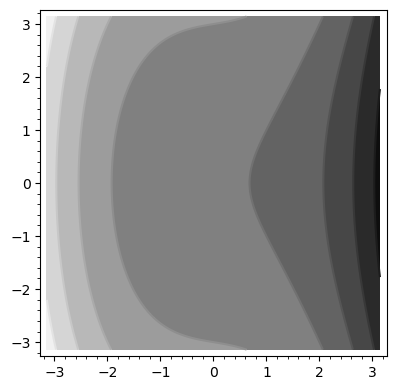

In [84]:
f(x,y)=y^2+1-x^3-x
contour_plot(f, (x,-pi,pi), (y,-pi,pi))

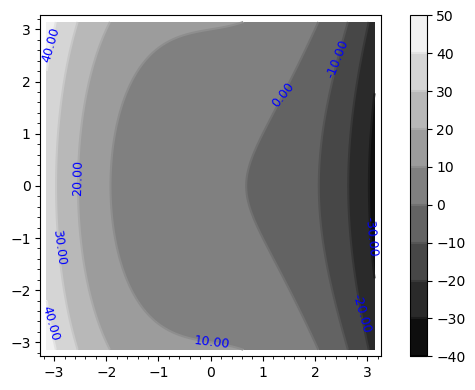

In [85]:
contour_plot(f, (x,-pi,pi), (y,-pi,pi), colorbar=True, labels=True)

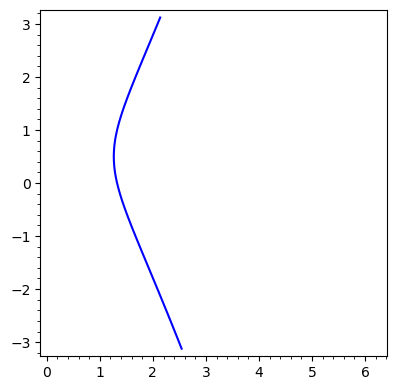

In [86]:
# Implicit plots
f(x,y) = -x**3 + y**2 - y + x + 1
implicit_plot(f(x,y)==0,(x,0,2*pi),(y,-pi,pi))

### Exercises

1. Experiment with the above examples by trying out different functions and plots.

2. Sage can do partial fractions for you as well. To do this, you first define your function you want to split up. Suppose you call it `f`. Then you use `f`.partial_fraction(x). Try this out

3. Sage can also create 3d plots. Create one. Start by looking at the documentation for `plot3d`.

Of the various math software, sage+python provides my preferred plotting environment. I have used sage to create plots for notes, lectures, classes, experimentation, and publications. You can quickly create good-looking plots. For example, I used sage/python extensively in creating [this note for my students](http://davidlowryduda.com/an-intuitive-overview-of-taylor-series/) on Taylor Series (which is a classic "hard topic" that students have lots of questions about, at least in the US universities I'm familiar with. To this day, about 1/6 of the traffic to my website is to see that page).

As a non-trivial example, I present the following interactive plot. 

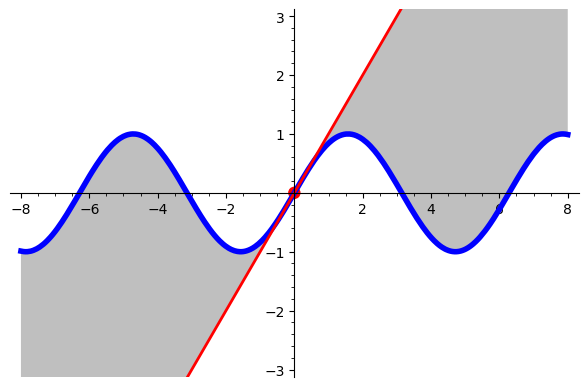

In [87]:
@interact
def g(f=sin(x), c=0, n=(1..30),
      xinterval=range_slider(-10, 10, 1, default=(-8,8), label="x-interval"),
      yinterval=range_slider(-50, 50, 1, default=(-3,3), label="y-interval")):
    x0 = c
    degree = n
    xmin,xmax = xinterval
    ymin,ymax = yinterval
    p   = plot(f, xmin, xmax, thickness=4)
    dot = point((x0,f(x=x0)),pointsize=80,rgbcolor=(1,0,0))
    ft = f.taylor(x,x0,degree)
    pt = plot(ft, xmin, xmax, color='red', thickness=2, fill=f)
    show(dot + p + pt, ymin=ymin, ymax=ymax, xmin=xmin, xmax=xmax)
    html('$f(x)\;=\;%s$'%latex(f))
    html('$P_{%s}(x)\;=\;%s+R_{%s}(x)$'%(degree,latex(ft),degree))

### Additional Resources and Comments

There are a variety of tutorials and resources for learning more about sage. I list several here.

1. Sage provides some tutorials of its own. These include its [Guided Tour](https://doc.sagemath.org/html/en/tutorial/tour.html) and the [Standard Sage Tutorial](https://doc.sagemath.org/html/en/tutorial/index.html). The Standard Sage Tutorial is designed to take 2-4 hours to work through, and afterwards you should have a pretty good sense of the sage environment.
2. [PREP Tutorials](http://doc.sagemath.org/html/en/prep/index.html) are a set of tutorials created in a program sponsored by the Mathematics Association of America, aimed at working with university students with sage. These tutorials are designed for people both new to sage and to programming.

See also the [main sage website](http://www.sagemath.org/).

For questions about specific things in sage, you can ask about these on [StackOverflow](https://stackoverflow.com/questions/tagged/sage) or [AskSage](https://ask.sagemath.org/questions/). You might also consider the sage-support or sage-edu [mailing lists](http://www.sagemath.org/help-groups.html).

It isn't necessary to know python to use sage, but a heavy sage user will benefit significantly from learning some python. Conversely, sage is very easy to use if you know python.